# **Import Library**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.model_selection import train_test_split

# **Loading Data**

In [2]:
df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/Dicoding: Latihan Studi Kasus Regresi/train.csv')
data_copy = df_train.copy()

# **Preprocessing Data**

In [3]:
# Melihat Informasi Kolom
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

In [ ]:
# Analisis Deskriptif
display(df_train.describe(include="all"))

# Cek Missing Value
missing_values = df_train.isnull().sum()
missing_values[missing_values>0]

# Mengapus Kolom Id
df_train = df_train.drop(columns=['id'])

In [4]:
# Analisis Outliners
Q1 = df_train.quantile(0.25)
Q3 = df_train.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

condition = ~((df_train < lower_bound) | (df_train > upper_bound)).any(axis=1)
df = df_train.loc[condition, df_train.columns]

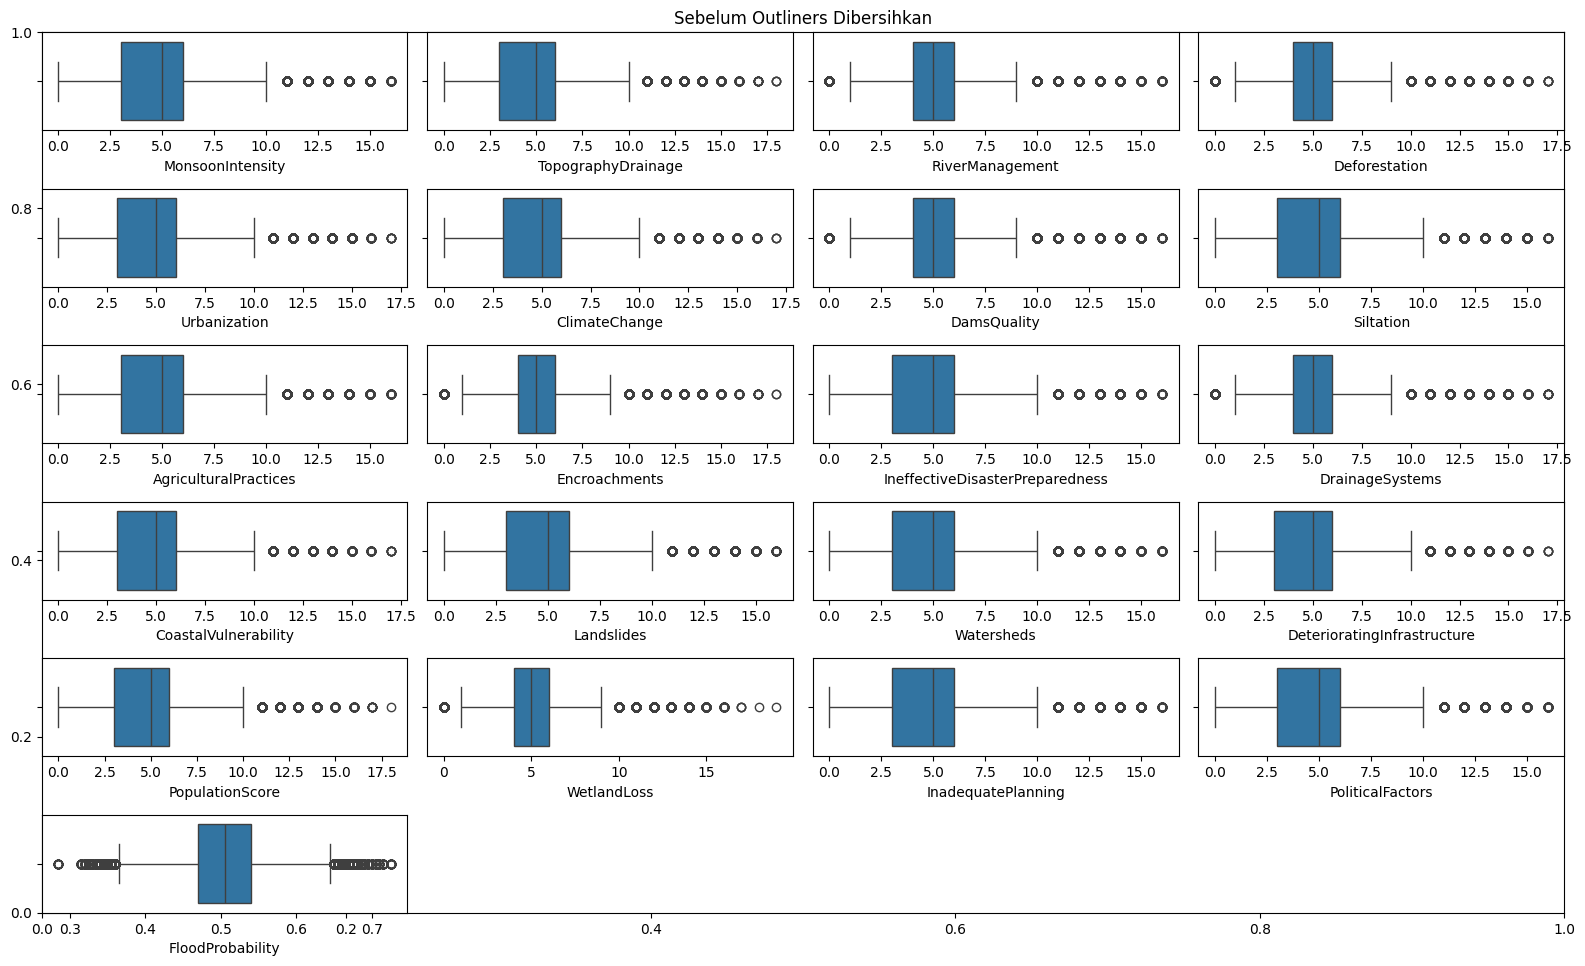

In [5]:
# Outliners Sebelum Dihapus
plt.figure(figsize=(16,10))
plt.title("Sebelum Outliners Dibersihkan")
for i, feature in enumerate(df_train.columns, 1):
  plt.subplot(6, 4, i)
  sns.boxplot(x=df_train[feature])
plt.tight_layout()
plt.show()

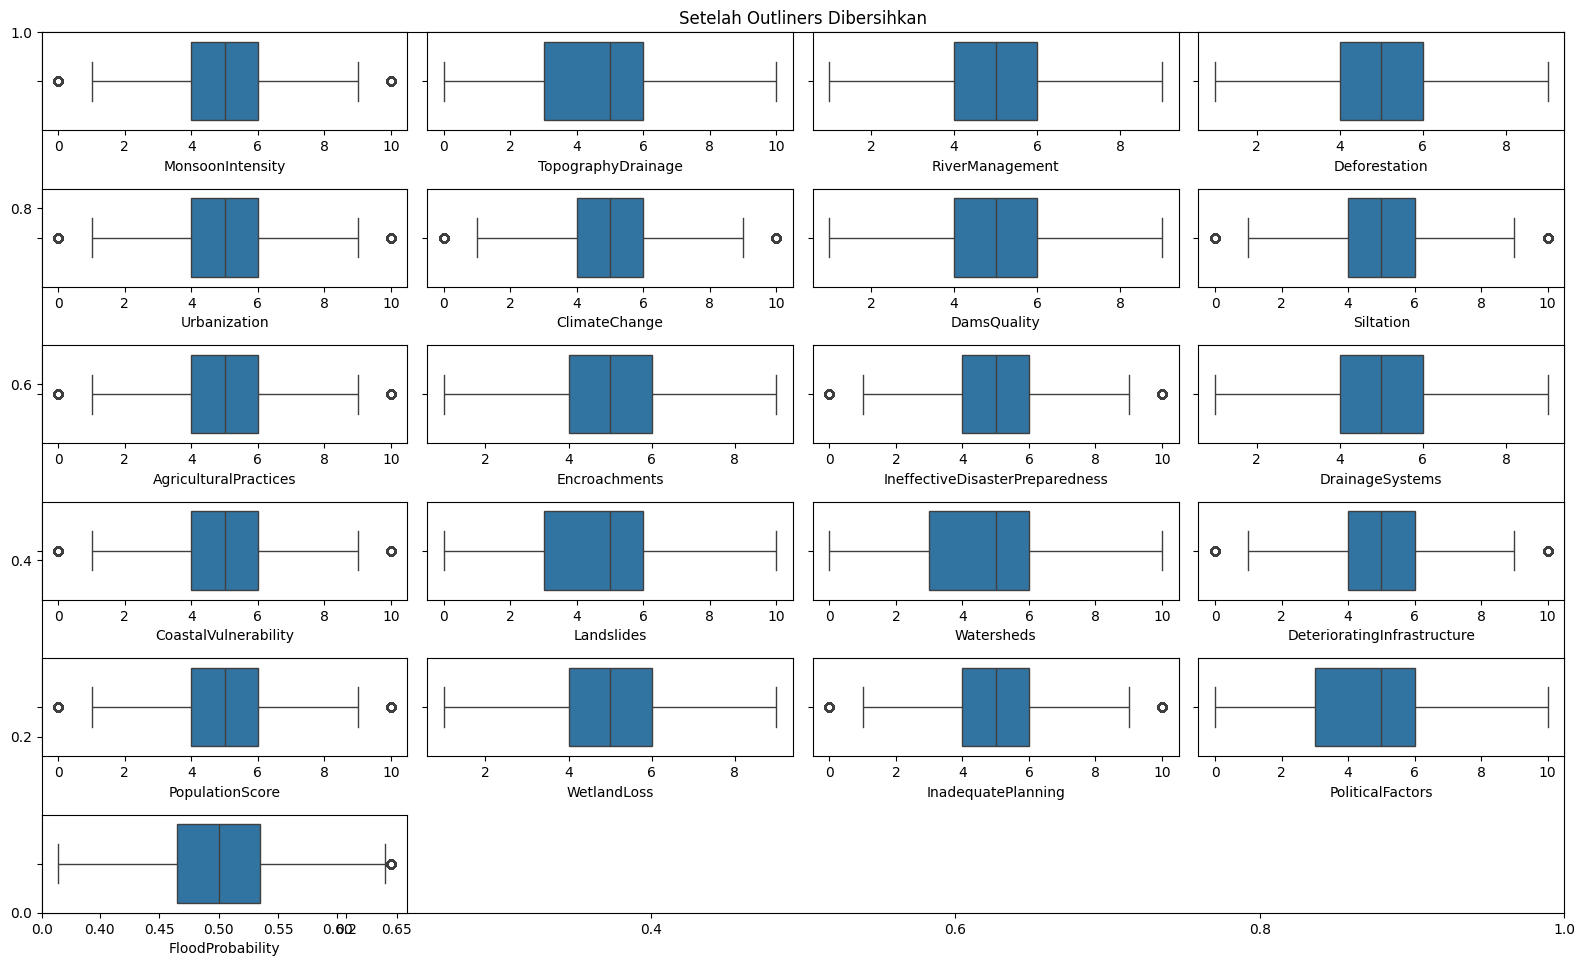

In [6]:
# Outliners Setelah Dihapus
plt.figure(figsize=(16,10))
plt.title("Setelah Outliners Dibersihkan")
for i, feature in enumerate(df.columns, 1):
  plt.subplot(6, 4, i)
  sns.boxplot(x=df[feature])
plt.tight_layout()
plt.show()

In [7]:
# Melakukan Standardisasi
numeric_features = df.select_dtypes(include='number').columns

scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

# Melakukan Pengecekan Duplikasi
duplicates = df.duplicated()
display(duplicates[duplicates == True])

,0


# **EDA**

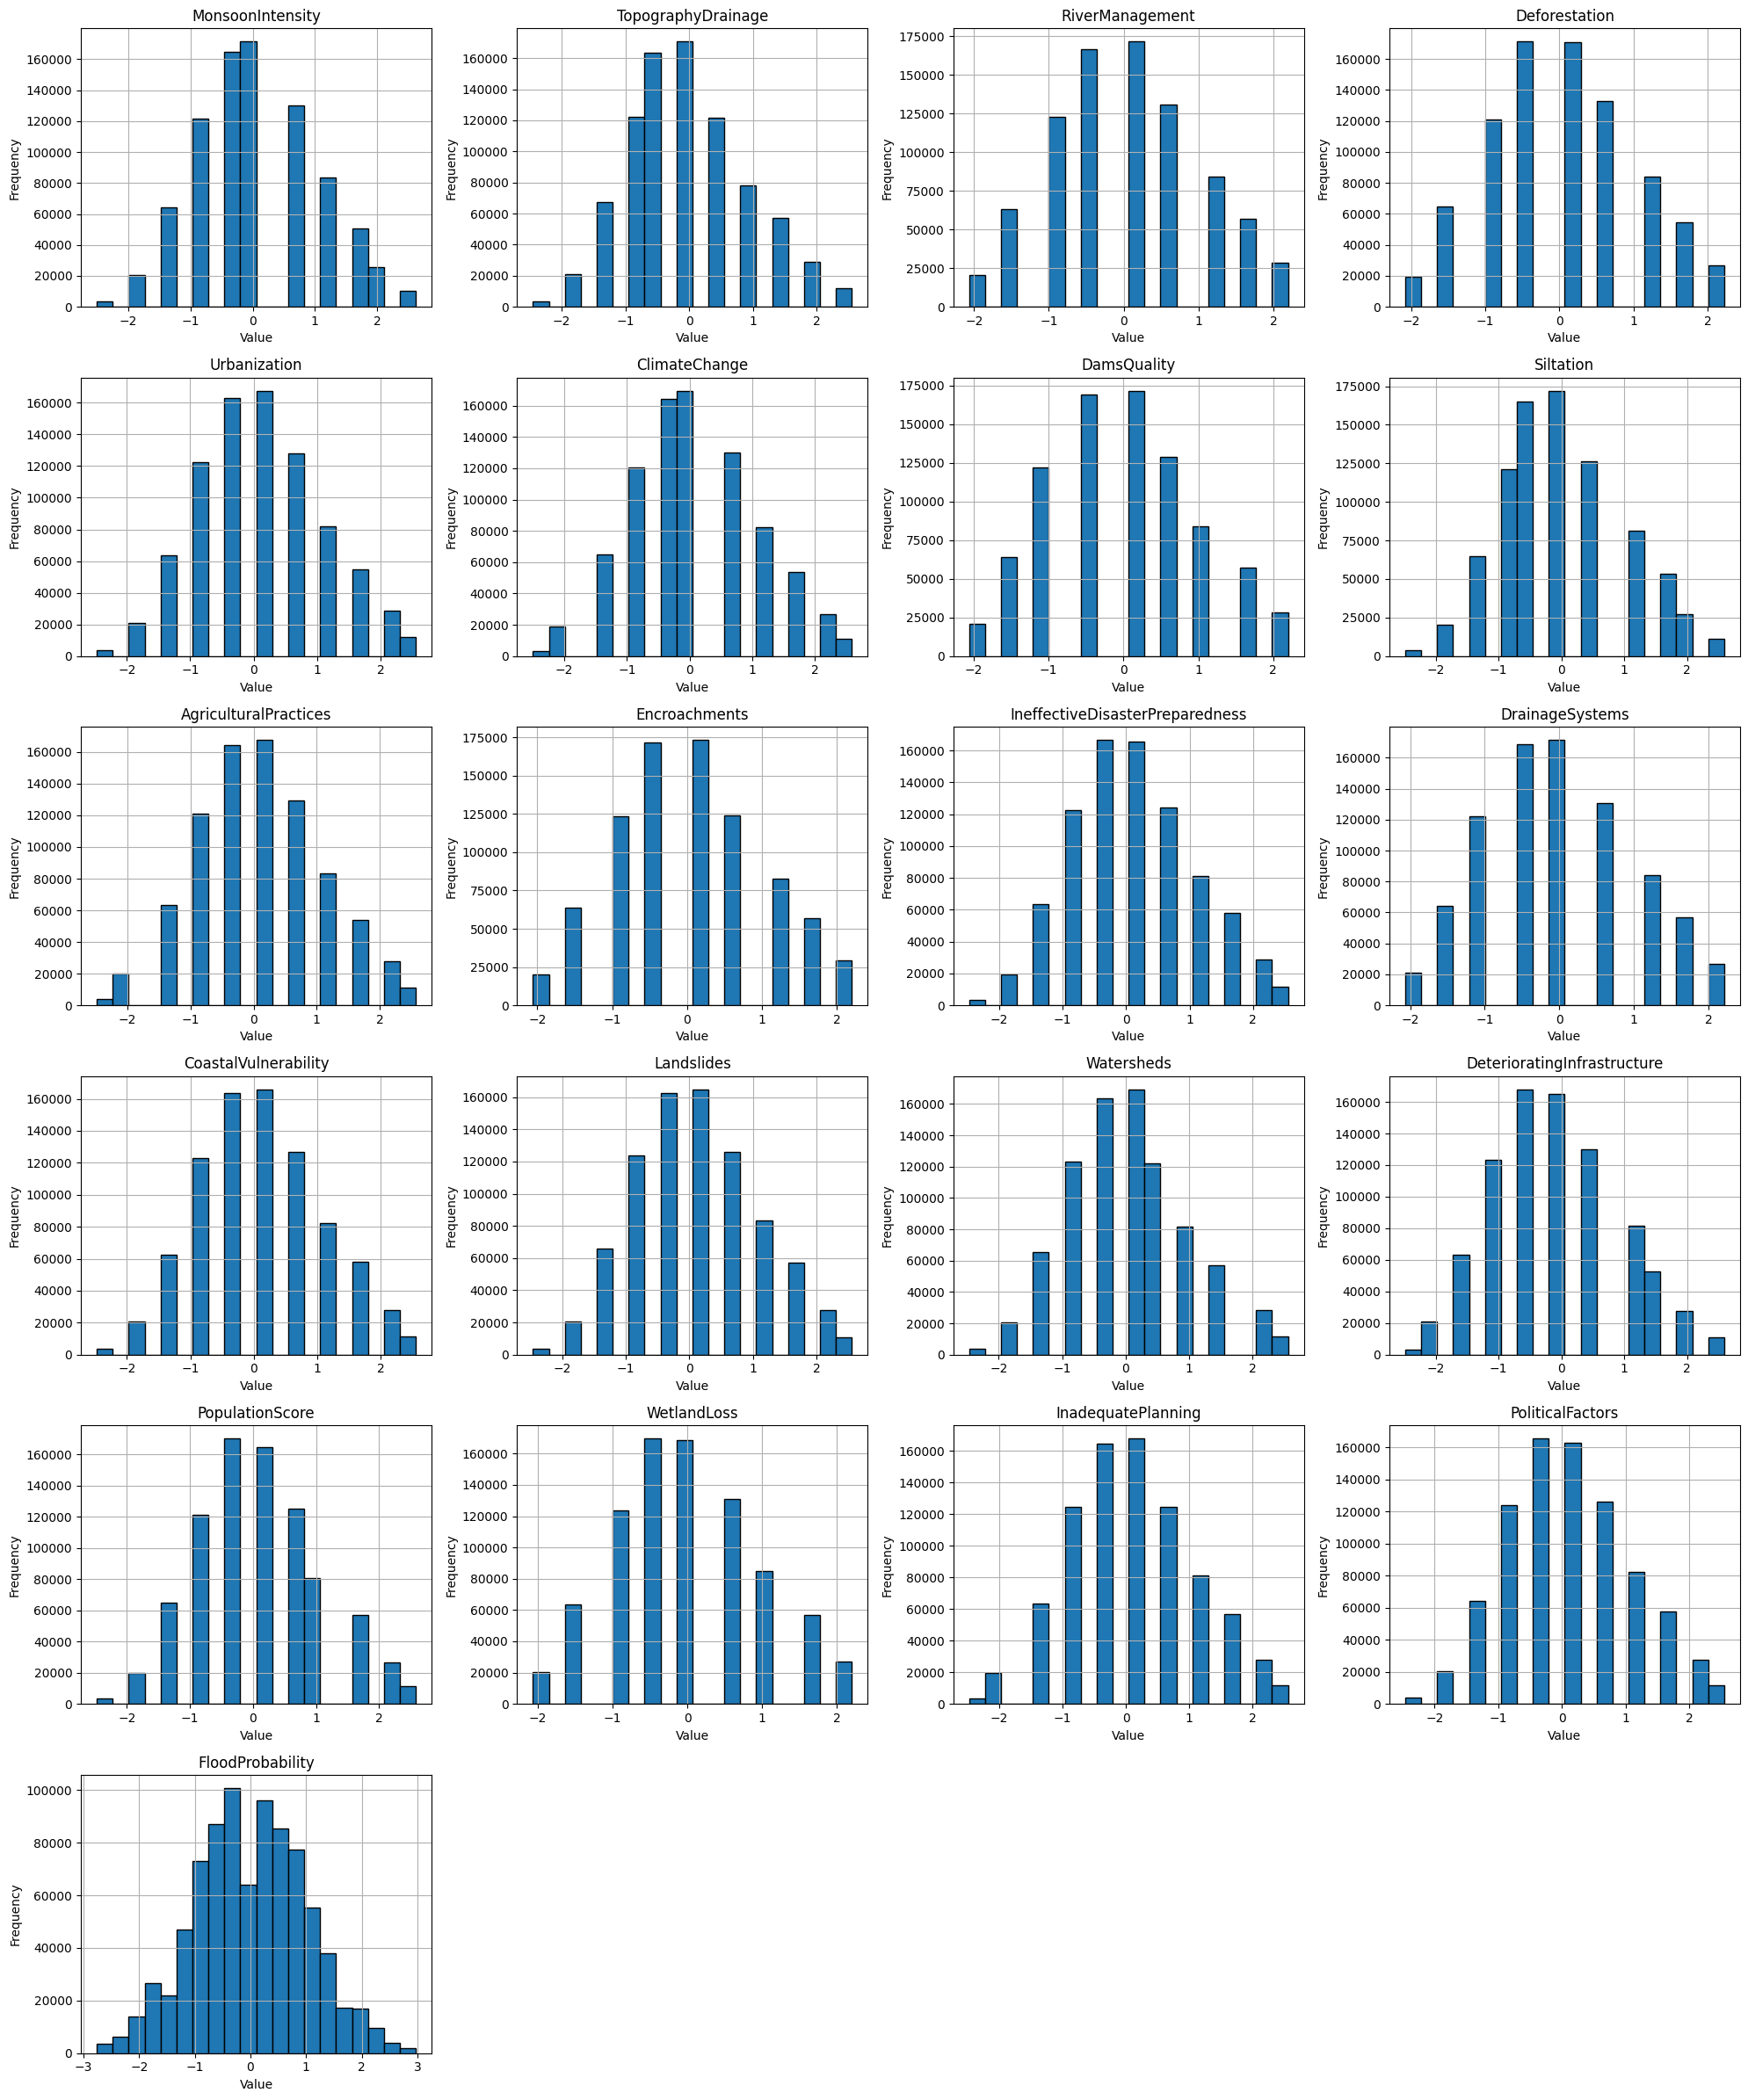

In [8]:
# Menghitung jumlah variabel
num_vars = df.shape[1]

# Menentukan jumlah baris dan kolom untuk grid subplot
n_cols = 4  # Jumlah kolom yang diinginkan
n_rows = -(-num_vars // n_cols)  # Ceiling division untuk menentukan jumlah baris

# Membuat subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))

# Flatten axes array untuk memudahkan iterasi jika diperlukan
axes = axes.flatten()

# Plot setiap variabel
for i, column in enumerate(df.columns):
    df[column].hist(ax=axes[i], bins=20, edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Menghapus subplot yang tidak terpakai (jika ada)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Menyesuaikan layout agar lebih rapi
plt.tight_layout()
plt.show()

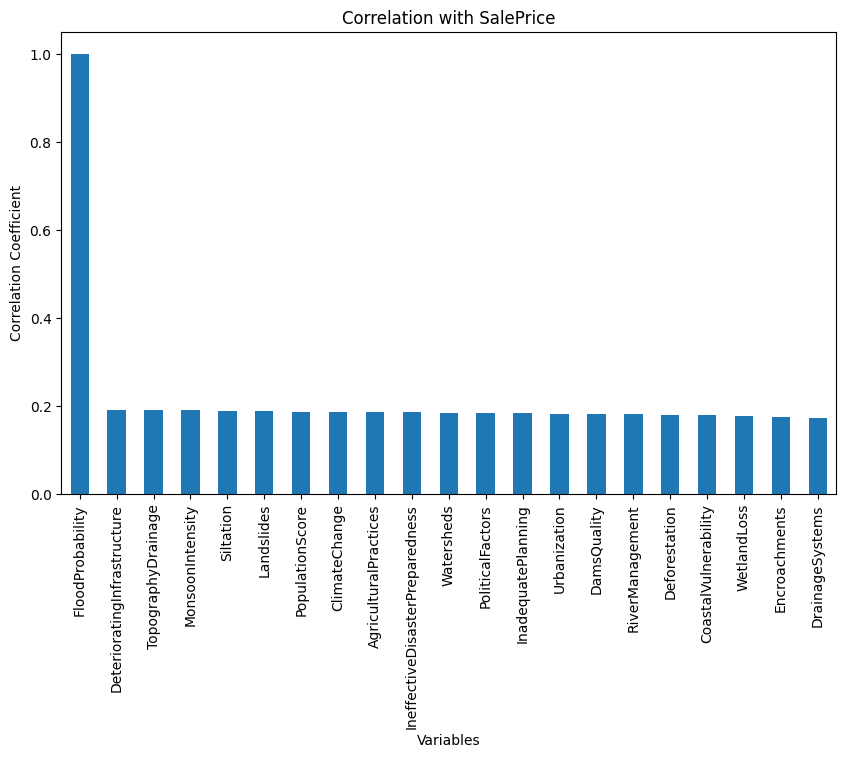

In [9]:
# Menghitung korelasi antara variabel target dan semua variabel lainnya
target_corr = df.corr()['FloodProbability']

# (Opsional) Mengurutkan hasil korelasi berdasarkan kekuatan korelasi
target_corr_sorted = target_corr.abs().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
target_corr_sorted.plot(kind='bar')
plt.title(f'Correlation with SalePrice')
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.show()

In [10]:
X = df.drop(columns='FloodProbability')
y = df['FloodProbability']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# menghitung panjang/jumlah data
print("Jumlah data: ",len(X))
# menghitung panjang/jumlah data pada x_test
print("Jumlah data latih: ",len(x_train))
# menghitung panjang/jumlah data pada x_test
print("Jumlah data test: ",len(x_test))

Jumlah data:  845886
Jumlah data latih:  676708
Jumlah data test:  169178


# **Training Model**

In [11]:
models = {
    'Lars': linear_model.Lars(n_nonzero_coefs=1),
    'Linear Regression': LinearRegression(),
    'GradientBoostingRegressor': GradientBoostingRegressor(random_state=184)
}

# Dictionary untuk menyimpan hasil evaluasi
results = {}

for name, model in models.items():
    model.fit(x_train, y_train)  # Melatih model
    pred = model.predict(x_test)  # Melakukan prediksi

    # Menyimpan metrik evaluasi
    results[name] = [
        mean_absolute_error(y_test, pred),
        mean_squared_error(y_test, pred),
        r2_score(y_test, pred)
    ]

In [12]:
# Membuat DataFrame dari hasil evaluasi
df_results = pd.DataFrame(results, index=['MAE', 'MSE', 'R2']).T
df_results

,MAE,MSE,R2
Lars,0.806497,0.998246,0.000764
Linear Regression,0.329142,0.171295,0.828535
GradientBoostingRegressor,0.512672,0.380491,0.619132
